In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# Initial Setup

In [2]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/final.csv')
sdf.params={'mass':0.00075}
sdf

,x,y,vx,vy,u,h,rho
0,0.998880,1.366894e-07,0.097866,0.002151,3.685128,0.045141,0.353339
1,0.999751,7.499884e-01,0.386724,-0.007235,3.736006,0.030830,0.757527
2,0.999449,2.410895e-02,0.294382,-0.321882,3.547137,0.034952,0.589382
3,0.998909,7.749505e-01,0.096796,-0.017863,3.664550,0.032112,0.698234
4,0.999090,5.005227e-02,0.162371,0.013952,3.583512,0.032832,0.667953
...,...,...,...,...,...,...,...
2995,0.991366,6.499964e-01,0.923592,-0.001277,1.816609,0.023467,1.307479
2996,0.991369,6.700014e-01,0.924695,0.000101,1.816190,0.023471,1.307027
2997,0.991365,6.900161e-01,0.923632,0.002504,1.824358,0.023392,1.315865
2998,0.991409,7.097664e-01,0.941758,-0.083285,1.828891,0.023353,1.320171


<Axes: xlabel='x', ylabel='y'>

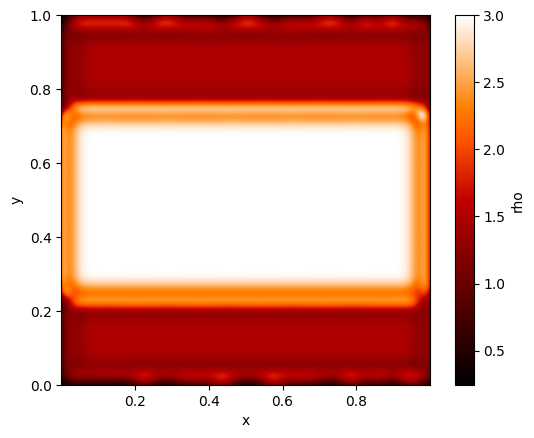

In [3]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [4]:
sdft = src.read_csv('../Data/results/kelvin_helmholtz/final.csv')
sdft

,x,y,vx,vy,u,h,rho
0,0.998880,1.366894e-07,0.097866,0.002151,3.685128,0.045141,0.353339
1,0.999751,7.499884e-01,0.386724,-0.007235,3.736006,0.030830,0.757527
2,0.999449,2.410895e-02,0.294382,-0.321882,3.547137,0.034952,0.589382
3,0.998909,7.749505e-01,0.096796,-0.017863,3.664550,0.032112,0.698234
4,0.999090,5.005227e-02,0.162371,0.013952,3.583512,0.032832,0.667953
...,...,...,...,...,...,...,...
2995,0.991366,6.499964e-01,0.923592,-0.001277,1.816609,0.023467,1.307479
2996,0.991369,6.700014e-01,0.924695,0.000101,1.816190,0.023471,1.307027
2997,0.991365,6.900161e-01,0.923632,0.002504,1.824358,0.023392,1.315865
2998,0.991409,7.097664e-01,0.941758,-0.083285,1.828891,0.023353,1.320171


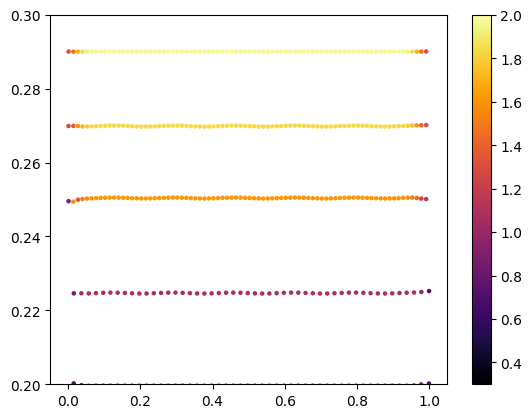

In [12]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
plt.colorbar()
plt.ylim(0.2, 0.3)
plt.show()

# Angular Momentum's Conservation

In [6]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [7]:
T = 220
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

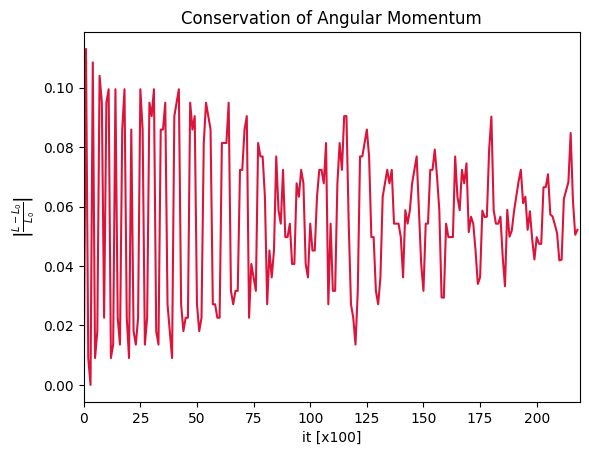

In [8]:
plt.plot(time[:-1], np.abs((ang_mom[:-1]-ang_mom[0])/ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{L-L_0}{L_0}\right|$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [9]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [10]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

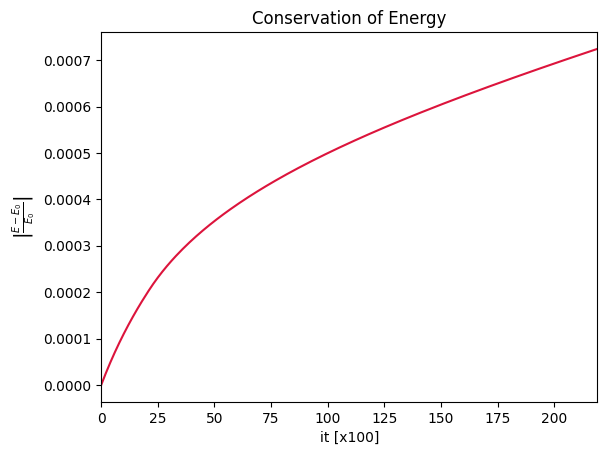

In [11]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()